# 1. Stacking 이란?


Stacking 의 'Stack'의 사전적 의미는 '쌓다' 정도로 볼 수 있다. 컴퓨터의 자료구조 중 하나로서' 스택' 이라는 개념도 존재하는데, 의미가 완전하게 동일하진 않지만 '쌓다' 라는 의미의 관점에서는 통한다고 볼 수 있을것 같다

앙상블의 모델종류중 하나로서 **Stacking이란, 개별적인 모델들이 학습하고 예측한 데이터를 쌓아서 또 다른 학습데이터를 만들고 이 데이터를 기반으로 메타 모델을 하나 더 만들어 예측하는 모델**이다.

# 2.Stacking 이 동작하는 방식

Stacking 은 위에서 언급했다 시피 개별적인 여러 모델이 학습을 하고 예측한 데이터를 다시 학습데이터로 학습 하는 메타 모델을 만들어서 예측하는 방법이다.

이를 간단히 도식화 하게 되면 다음과 같다

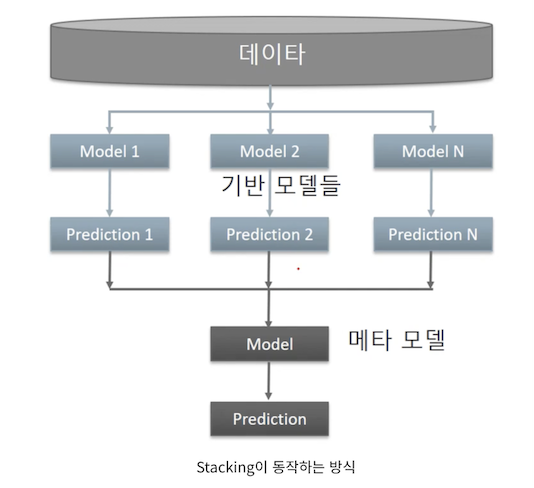

그렇다면 개별적인 여러 모델을 예측한 결과값을 어떻게 쌓는(stacking)다는 걸까?

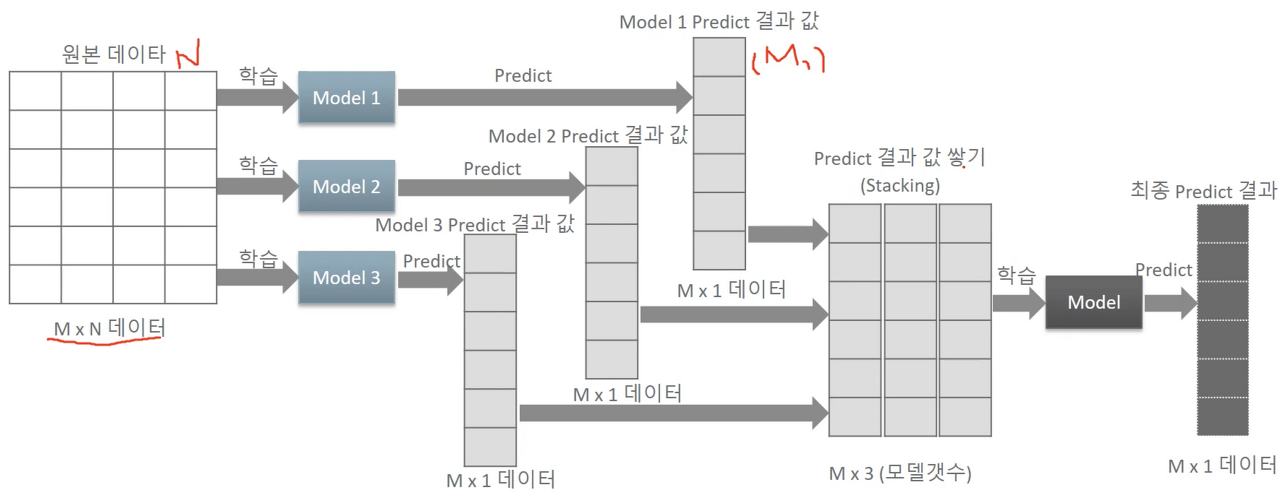

그림의 왼쪽처럼 M by N의 원본 데이터가 존재할때 개별적인 모델인 Model 1~3 이 원본 데이터를 학습하고 각각의 결과값을 1차원 array형태로 반환해준다. 그리고 결과값들을 학습데이터의 포맷형태로 변환 시켜주기 위해 반환된 예측 결과값들을 Stacking 해준다. 그리고 이 Stacking 한 데이터를 기반으로 사전에 설정 해주었던 메타 모델을 학습시켜 최종 예측 결과값을 반환하게 된다

그런데 **Stacking은 보통 CV(Cross validation)형태의 Stacking을 사용**하는 것으로 알려져있다. 그렇다면 CV를 활용한 Stacking 방법은 어떻게 동작할까? 우선 개별 모델 안에서 CV하는 과정부터 살펴보자

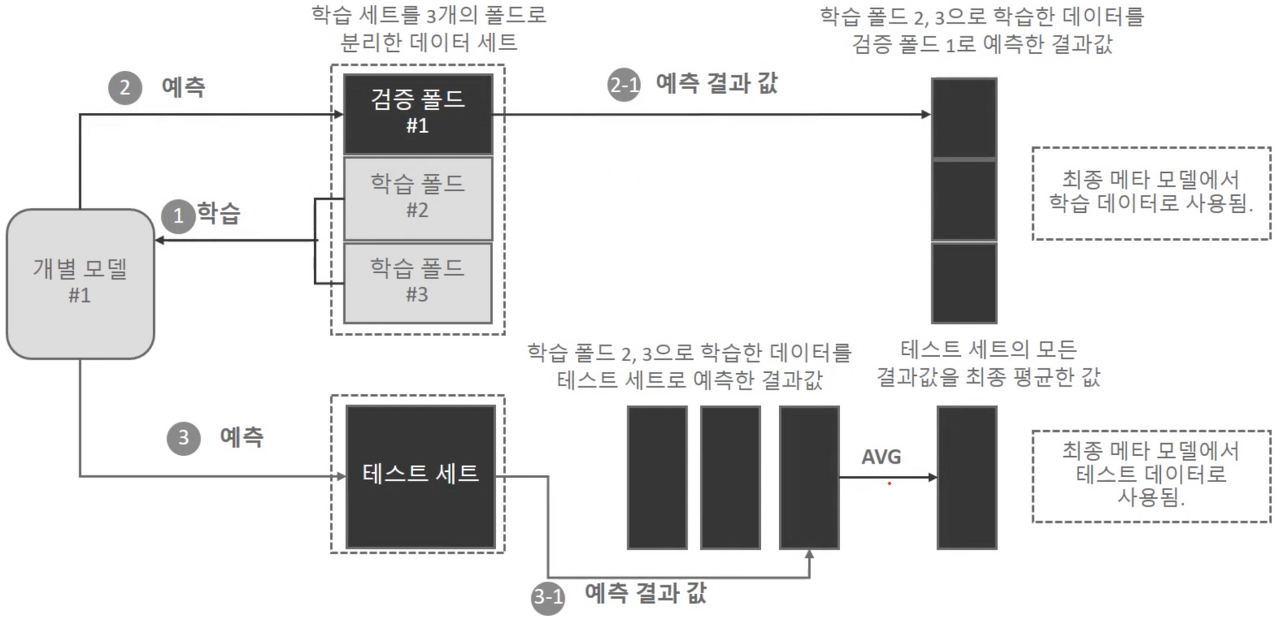

위 그림은 K-fold라는 CV 방법을 사용했고 이때 K값은 3으로 3개의 fold를 설정하고 가정한 후 진행되는 과정이다. 먼저 학습 데이터에서 1번째 fold를 검증 fold로 사용하고 2,3번 fold를 기반으로 개별 모델이 학습을 한다. 그리고 검증폴드인 1번 fold로 예측값을 반환한다. 추가적으로 2,3번 fold 를 기반으로 학습한 모델이 원본의 테스트 데이터셋을 대상으로 또 한 번 예측결과값을 반환한다.

이렇게 되면 **결국 개별 모델이 예측을 2번한 셈이고 예측결과값이 2개의 세트(정확하게 이야기하면 2개의 array가) 된다.** 이때 2개의 결과값들 중 **학습 데이터 내부의 검증 fold에 기반해 예측한 결과값은 최종 메타 모델에서 학습데이터(그림 속2번과 2-1번)**로, **다른 결과값은 최종 메타 모델에서 테스트 데이터로 사용(그림속 3번과 3-1반)**이 된다. 이렇게 하면 fold1번에 대한 완전한 iteration이 동작한 셈이다

fold횟수를 3으로 설정했으니 이렇게 똑같은 과정을 3번을 반복한다. 3번을 모두 실시한 후 마지막으로 해주어야 하는것은 **각각의 검증 폴드에 의해 나온 예측 결과값들끼리 Stacking**하고 **원본 테스트 세트를 예측했을때 나온3번의 결과값들을 averages(평균값)을 취해줌으로써 Stacking 해준다**

위와 같은 과정이 개별모델 1개에서 이루어지는 CV가 적용된 Stacking 과정이다.

이제 남은 절차는 **개별적인 모델들이 내놓은 예측결과값들을 기반으로 학습 데이터와 검증 데이터를 만드는 과정**을 할 차례다. 다음 그림을 보자.

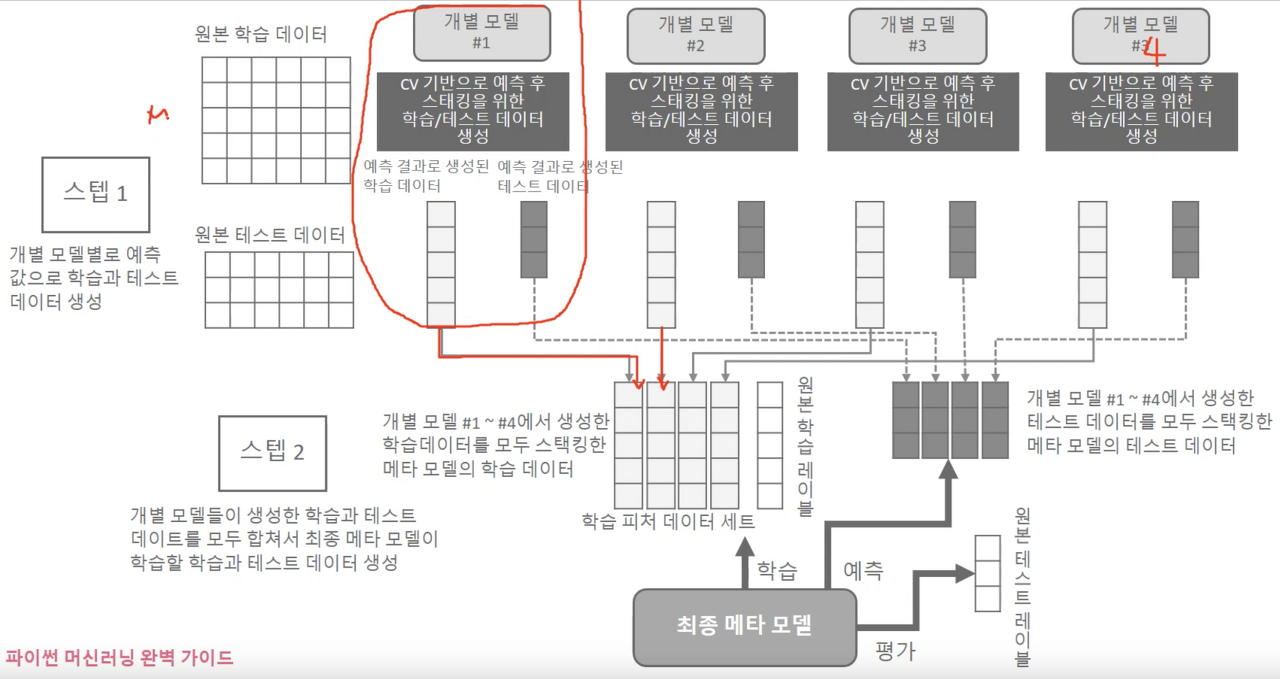

이제 개별 모델들이 CV를 기반으로 Stacking을 함으로써 메타모델이 학습할 학습/검증 데이터를 생성을 완료했다. 이제 개별 모델이 생성한 학습/검증 데이터들을 각각 Stacking을 해주자. 우선 **개별 모델들이 도출해낸 학습데이터** 들을 Stacking한후 최종 메타 모델을 학습**시킨다.이 때 최종 메타 모델을 학습시키는 데이터들 즉, 개별 모델들이 도출해낸 학습데이터들을 Stacking한 데이터**의 **label(정답=y값)은 맨처음 에 주어졌던 원본(raw) 학습 데이터의 label을 갖고 학습시켜야 한다**

그리고 개별모델들이 도출시켰던 검증 데이터 셋들도 똑같이 Stacking 시키고 최종 메타 모델이 이 Stacking한 데이터들을 기반으로 평가(검증)할때는 **원본 테스트 데이터의 label을 갖고 평가해야 한다.**

#참고자료

[ML] Scikit-learn을 이용한 Stacking 구현하기 티스토리 : https://techblog-history-younghunjo1.tistory.com/103?category=922523